In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from bep.utils import load_train_val_datasets


ROOT_DIR = os.path.abspath("../")

figsize = 25
image_count = 1

In [3]:
_, _, data = load_train_val_datasets(ROOT_DIR)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


**Original Image**

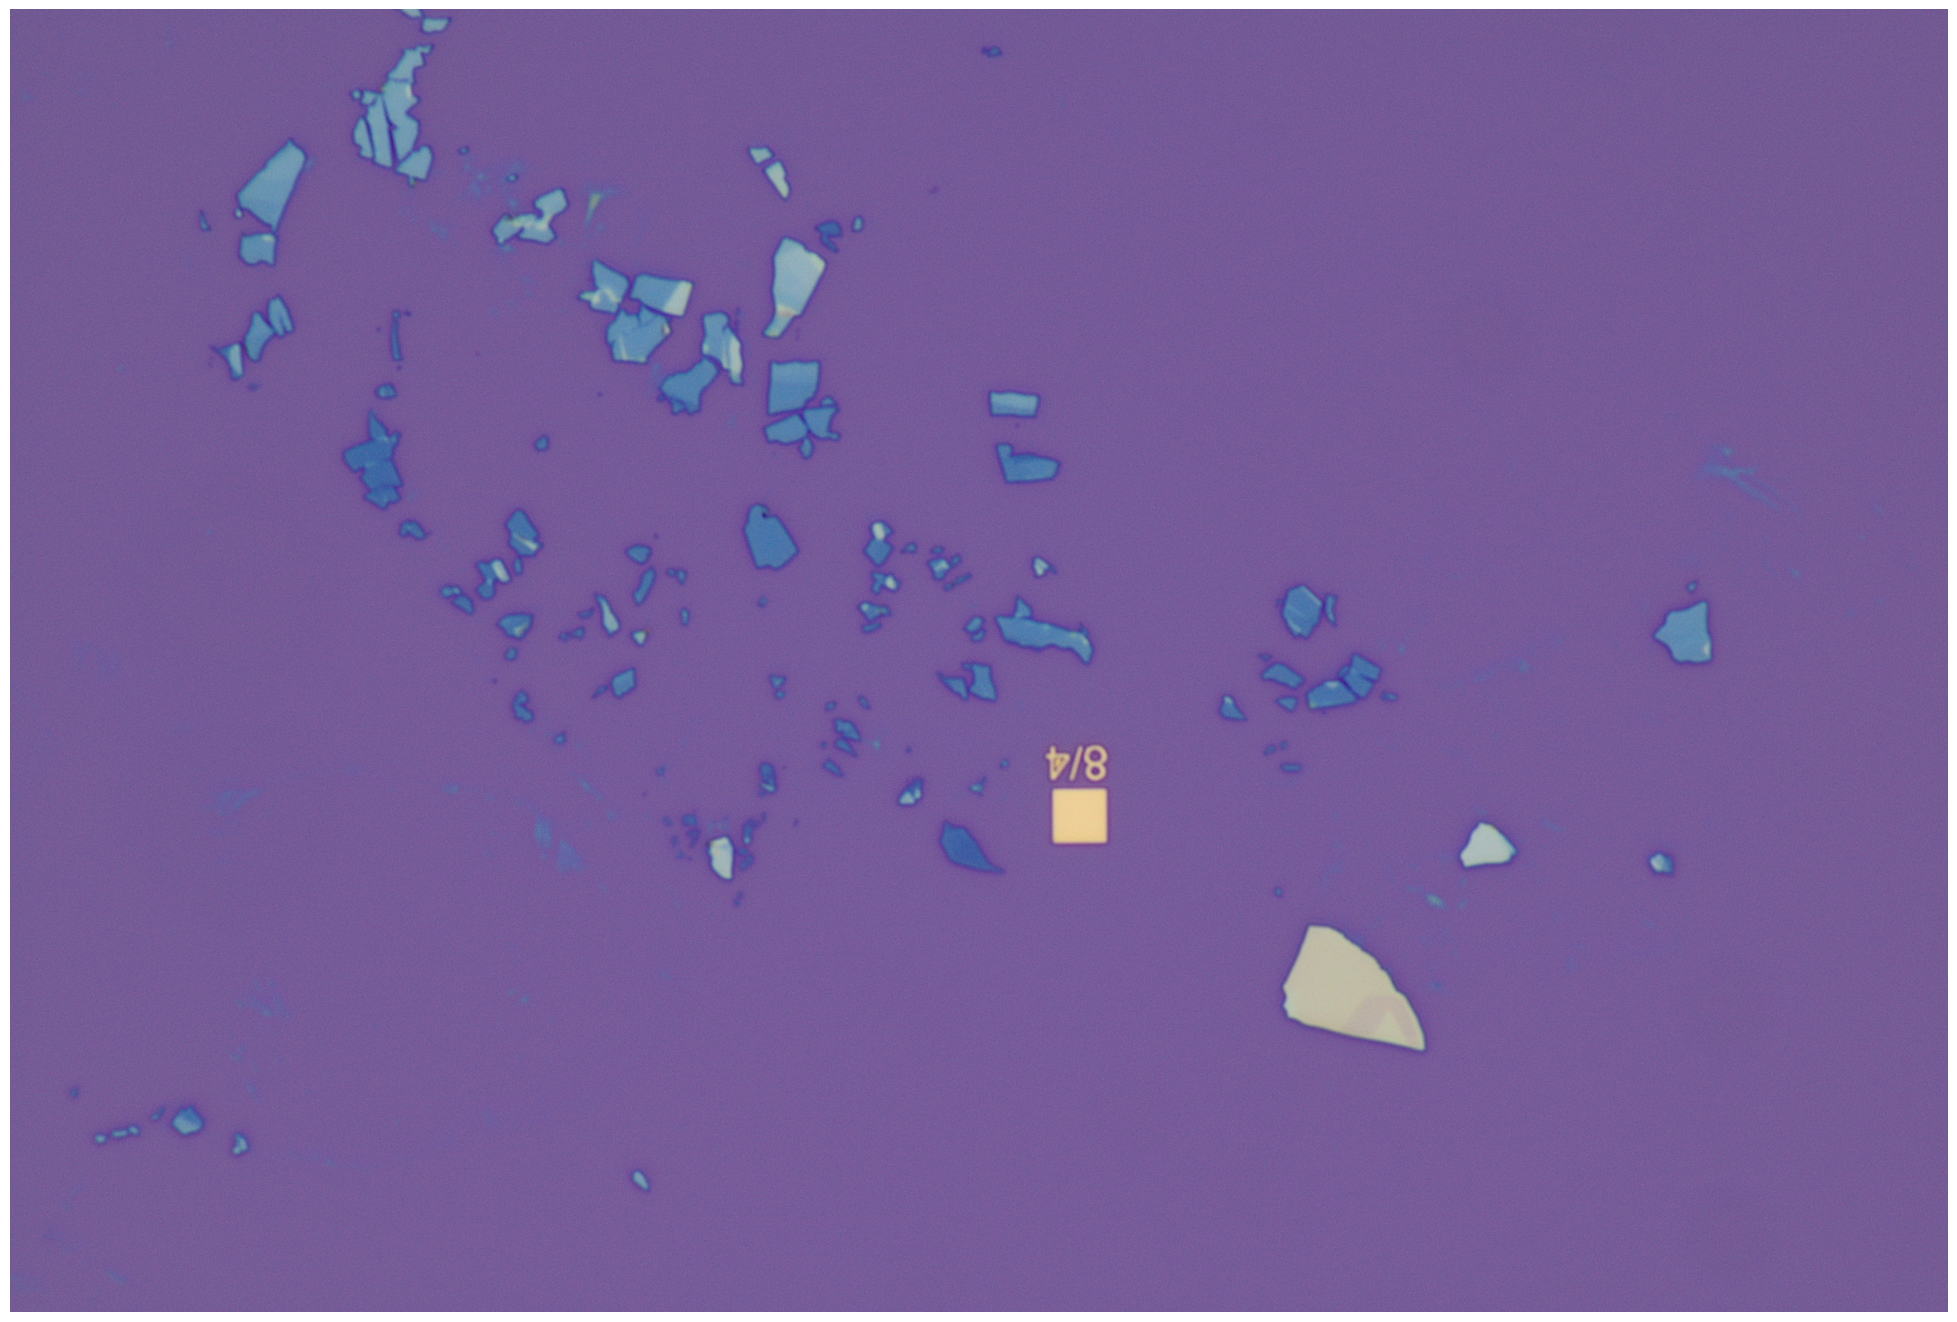

In [4]:
image_id = 2
border = 10

image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(figsize, figsize))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


**Only bbox with color background**

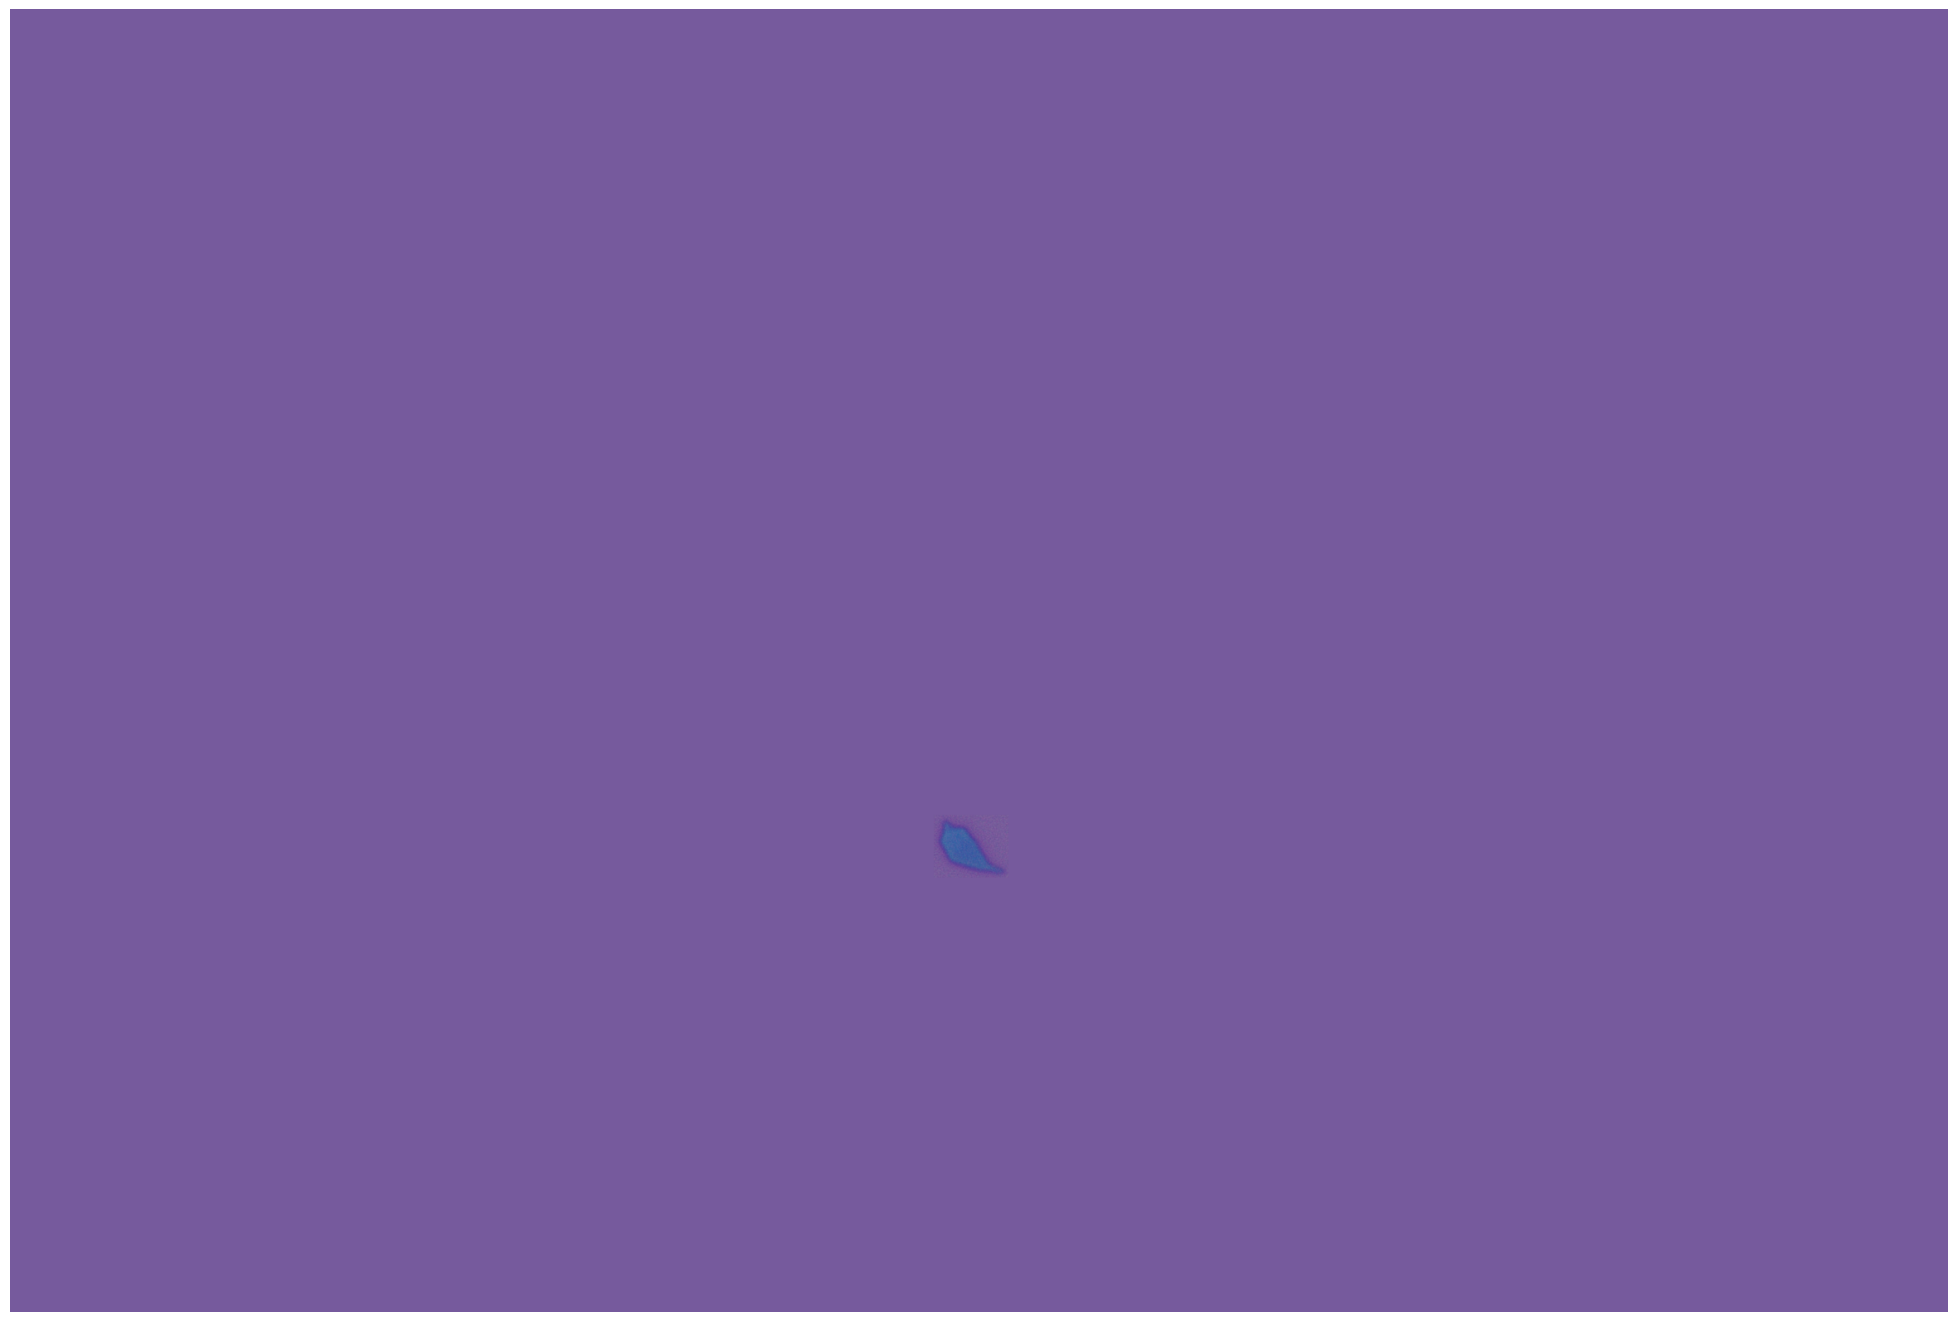

True

In [21]:
image_id = 2
border = 10

image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

background_color = (118, 90, 157)

for idx, annotation in enumerate(data.image_info[image_id]['annotations']):
    bbox = annotation['bbox']

    x, y, w, h = [int(i) for i in bbox]
    flake_image = np.full_like(image, background_color)


    flake_image[y-border:y+h+border, x-border:x+w+border] = image[y-border:y+h+border, x-border:x+w+border]
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(flake_image)
    plt.axis('off')  # Hide axis
    plt.show()

    if idx >= image_count - 1:
        break

cv2.imwrite(os.path.join(ROOT_DIR, 'data', 'images', 'syn', 'cropped_purple_bg.png'), cv2.cvtColor(flake_image, cv2.COLOR_RGB2BGR))

**Fill background with sample**

In [35]:
square_size = 50
small_square = cv2.GaussianBlur(image[:square_size, :square_size], (11,11), 0)

tile_height, tile_width = small_square.shape[:2]
num_tiles_y = image.shape[0] // tile_height + 1
num_tiles_x = image.shape[1] // tile_width + 1
tiled_background = np.tile(small_square, (num_tiles_y, num_tiles_x, 1))[:image.shape[0], :image.shape[1], :]

image_id = 2
border = 10

image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

background_color = (118, 90, 157)

for idx, annotation in enumerate(data.image_info[image_id]['annotations']):
    bbox = annotation['bbox']
    x, y, w, h = [int(i) for i in bbox]

    flake_image = tiled_background.copy()
    flake_image = cv2.GaussianBlur(flake_image, (11, 11), 0)
    flake_image[y-border:y+h+border, x-border:x+w+border] = image[y-border:y+h+border, x-border:x+w+border]

    # plt.figure(figsize=(figsize, figsize))
    # plt.imshow(flake_image)
    # plt.axis('off')  # Hide axis
    # plt.show()

    area = w*h

    cv2.imwrite(os.path.join(ROOT_DIR, 'data', 'images', 'syn', f'cropped_sample_bg_{idx}_{area}.png'), cv2.cvtColor(flake_image, cv2.COLOR_RGB2BGR))

    # if idx >=:
    #     break


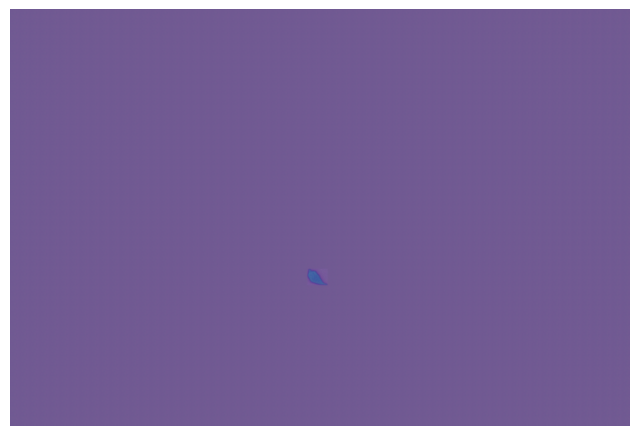

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parameters
square_size = 50
border = 20  # Increase the border size for a stronger blend
blend_strength = 31  # Larger Gaussian kernel for a stronger blend

# Prepare the tiled background
small_square = image[:square_size, :square_size]
tile_height, tile_width = small_square.shape[:2]
num_tiles_y = image.shape[0] // tile_height + 1
num_tiles_x = image.shape[1] // tile_width + 1
tiled_background = np.tile(small_square, (num_tiles_y, num_tiles_x, 1))[:image.shape[0], :image.shape[1], :]

# Load the image and process annotations
image_id = 2
image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for idx, annotation in enumerate(data.image_info[image_id]['annotations']):
    bbox = annotation['bbox']
    x, y, w, h = [int(i) for i in bbox]

    # Copy the tiled background and apply Gaussian blur to the entire background
    flake_image = tiled_background.copy()
    flake_image = cv2.GaussianBlur(flake_image, (11, 11), 0)

    # Overlay the original image cutout onto the blurred background
    flake_image[y:y+h, x:x+w] = image[y:y+h, x:x+w]

    # Create an enlarged mask around the bounding box for a stronger blend effect
    mask = np.zeros((h + 2 * border, w + 2 * border, 3), dtype=np.uint8)
    mask[border:border + h, border:border + w] = 255

    # Apply a stronger blur to the mask
    mask = cv2.GaussianBlur(mask, (blend_strength, blend_strength), 0)

    # Define the cutout region for the mask and flake_image
    cutout = flake_image[y - border:y + h + border, x - border:x + w + border]
    cutout_masked = (mask / 255) * image[y - border:y + h + border, x - border:x + w + border] + \
                    ((1 - mask / 255) * cutout)

    # Place the blended cutout back onto the flake_image
    flake_image[y - border:y + h + border, x - border:x + w + border] = cutout_masked

    # Display the final image with stronger blurred borders
    plt.figure(figsize=(8, 8))
    plt.imshow(flake_image)
    plt.axis('off')  # Hide axis
    plt.show()


    if idx >= image_count - 1:
        break
